# B - Fashion MNIST: Deep Learning mit Bilddaten

Klassifikation von Kleidungskategorien mittels Deep Learning auf dem Fashion-MNIST Datensatz von Zalando: [github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist). Das Notebook baut auf Gérons' Notebooks begleitend zum Buch: [github.com/ageron/handson-ml3/blob/master/10_neural_nets_with_keras.ipynb](https://github.com/ageron/handson-ml3/blob/master/10_neural_nets_with_keras.ipynb).

## Daten laden
Wir laden die Daten via Keras

In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

2023-12-15 00:33:29.929141: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/Caskroom/miniconda/base/envs/ads-ml-full/lib/python3.11/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

### Trainings- und  Testdaten

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

## Fashion MNIST Überblick

In [6]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

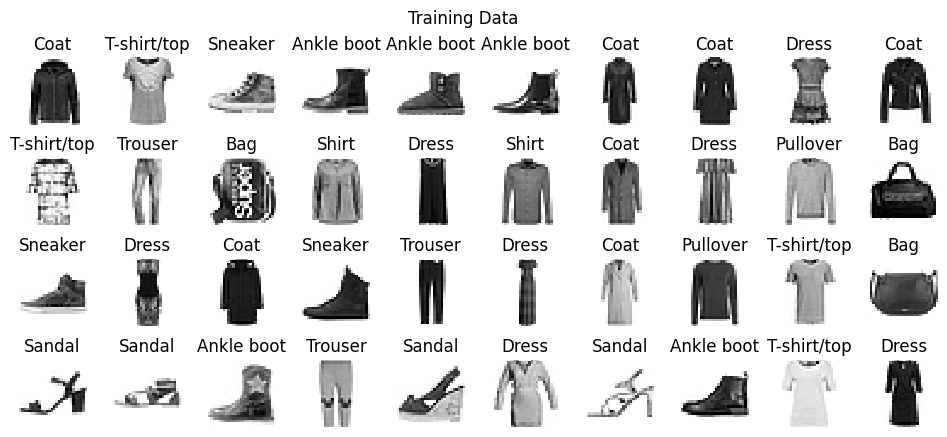

In [7]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle("Training Data")
plt.show()

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [11]:
import tensorflow as tf
import numpy as np

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.06916504,  0.0383549 ,  0.06657717, ...,  0.06329161,
        -0.06227642,  0.00586135],
       [-0.04096925, -0.03981487,  0.03825383, ..., -0.02215319,
        -0.02455637,  0.05824114],
       [-0.00293452,  0.02038682, -0.0022501 , ...,  0.07295309,
         0.02742652, -0.03522229],
       ...,
       [ 0.00473024, -0.04892538, -0.00812592, ...,  0.04457679,
        -0.0125909 ,  0.06224999],
       [ 0.07438949,  0.06649259,  0.0670978 , ...,  0.00063099,
         0.06424196, -0.04595204],
       [ 0.05408323, -0.06600135, -0.01227504, ..., -0.0642534 ,
         0.00087345, -0.05798343]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
from tensorflow.keras.callbacks import TensorBoard

tb_callback = TensorBoard("./tf_logs/fmnist-nn/trial-A", update_freq=1)

In [18]:
%%time
history = model.fit(
    X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tb_callback]
)

Epoch 1/100
1719/1719 [==============================] - 64s 36ms/step - loss: 0.7107 - accuracy: 0.7643 - val_loss: 0.5185 - val_accuracy: 0.8230
Epoch 2/100
1719/1719 [==============================] - 67s 39ms/step - loss: 0.4868 - accuracy: 0.8293 - val_loss: 0.4356 - val_accuracy: 0.8504
Epoch 3/100
1719/1719 [==============================] - 48s 28ms/step - loss: 0.4403 - accuracy: 0.8447 - val_loss: 0.5514 - val_accuracy: 0.7960
Epoch 4/100
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4136 - accuracy: 0.8546 - val_loss: 0.3918 - val_accuracy: 0.8680
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3951 - accuracy: 0.8622 - val_loss: 0.3778 - val_accuracy: 0.8660
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3768 - accuracy: 0.8670 - val_loss: 0.3687 - val_accuracy: 0.8738
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3646 - accuracy: 0.8708 - val_loss: 0.3646

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.4200 - accuracy: 0.8869


[0.42003685235977173, 0.886900007724762]

In [22]:
X_new = X_test[:40]
y_proba = model.predict(X_new)
y_proba.round(2)

2/2 [==============================] - 0s 21ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.51, 0.  , 0.

In [23]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

2/2 [==============================] - 0s 34ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 2, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9])

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal',
       'Dress', 'Pullover', 'Trouser', 'Pullover', 'Pullover', 'Bag',
       'T-shirt/top', 'Pullover', 'Sandal', 'Sneaker', 'Sandal',
       'Trouser', 'Coat', 'Shirt', 'T-shirt/top', 'Ankle boot', 'Dress',
       'Bag', 'Bag', 'Dress', 'Dress', 'Bag', 'T-shirt/top', 'Sneaker',
       'Sandal', 'Sneaker', 'Ankle boot'], dtype='<U11')

In [25]:
y_new = y_test[:40]
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9], dtype=uint8)

## Predictions

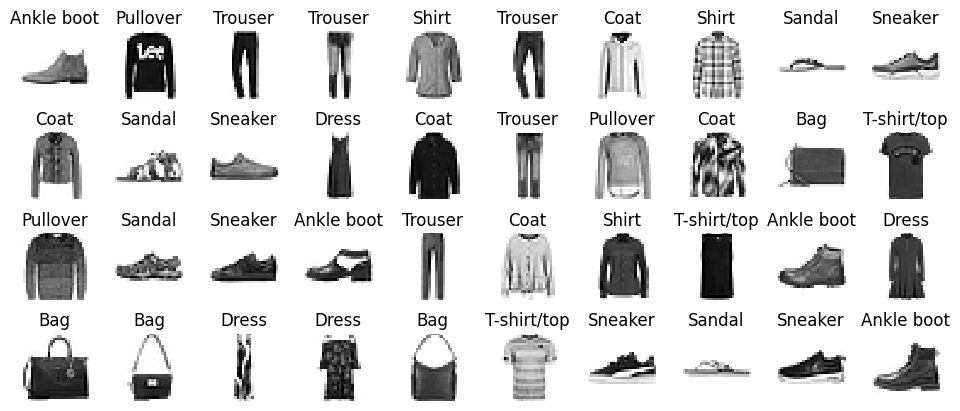

In [26]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_new[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()